In [42]:
# import modules, define some functions for loading, saving and processing a gene-barcode matrix
%matplotlib inline
import collections
import matplotlib
from matplotlib import pyplot
import numpy 
import pandas
import scipy.sparse as sp_sparse
import h5py
import os
import pysam

In [2]:
numpy.random.seed(0)

FeatureBCMatrix = collections.namedtuple('FeatureBCMatrix', ['feature_ids', 'feature_names', 'barcodes', 'matrix'])

def get_matrix_from_h5(filename):
    with h5py.File(filename) as f:
        if u'version' in f.attrs:
            if f.attrs['version'] > 2:
                raise ValueError('Matrix HDF5 file format version (%d) is an newer version that is not supported by this function.' % version)
        else:
            raise ValueError('Matrix HDF5 file format version (%d) is an older version that is not supported by this function.' % version)
        
        feature_ids = [x.decode('ascii', 'ignore') for x in f['matrix']['features']['id']]
        feature_names = [x.decode('ascii', 'ignore') for x in f['matrix']['features']['name']]        
        barcodes = list(f['matrix']['barcodes'][:])
        matrix = sp_sparse.csc_matrix((f['matrix']['data'], f['matrix']['indices'], f['matrix']['indptr']), shape=f['matrix']['shape'])
        return FeatureBCMatrix(feature_ids, feature_names, barcodes, matrix)

def get_expression(fbm, gene_name):
    try:
        gene_index = feature_bc_matrix.feature_names.index(gene_name)
    except ValueError:
        raise Exception("%s was not found in list of gene names." % gene_name)
    return fbm.matrix[gene_index, :].toarray().squeeze()

In [5]:
filtered_matrix_h5 = os.path.expanduser("~/proj/brian-2018-01-10x/Wold10x-7-encode-count-cells10000/outs/filtered_feature_bc_matrix.h5")
%time feature_bc_matrix = get_matrix_from_h5(filtered_matrix_h5)



CPU times: user 17.6 s, sys: 216 ms, total: 17.8 s
Wall time: 17.9 s


In [7]:
# calculate UMIs and genes per cell
umis_per_cell = numpy.asarray(feature_bc_matrix.matrix.sum(axis=0)).squeeze()
genes_per_cell = numpy.asarray((feature_bc_matrix.matrix > 0).sum(axis=0)).squeeze()



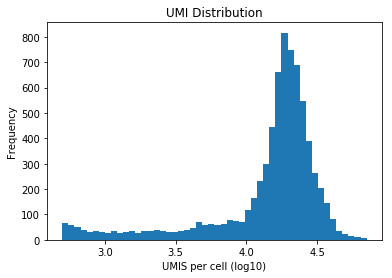

In [10]:
# plot UMIs per cell
pyplot.hist(numpy.log10(umis_per_cell), bins=50)
pyplot.xlabel('UMIS per cell (log10)')
pyplot.ylabel('Frequency')
pyplot.title('UMI Distribution')
pyplot.show()

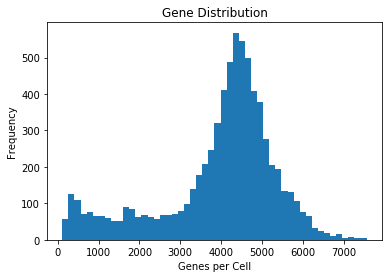

In [11]:
# plot genes per cell
pyplot.hist(genes_per_cell, bins=50)
pyplot.xlabel('Genes per Cell')
pyplot.ylabel('Frequency')
pyplot.title('Gene Distribution')
pyplot.show()

In [15]:
feature_bc_matrix.feature_names.index('Pax3')

1283

In [18]:
feature_bc_matrix.matrix[1283][feature_bc_matrix.matrix[1283] > 0]

matrix([[ 2, 10,  6,  1,  8, 21,  9,  2,  9, 13,  5, 10,  9,  2,  3,  5,
          2,  1,  5,  4,  5, 11,  3,  1,  4,  2,  5,  7,  1,  6,  3,  1,
          5,  2,  7,  1,  7,  5,  3,  6,  9, 15, 24, 12, 11,  3,  5,  5,
          4, 14,  5, 15,  9,  8,  9,  4,  5,  4,  4, 13,  4,  1, 14,  4,
          1,  6, 14,  6, 17,  5,  3,  4,  2,  1,  1,  8,  1, 14,  1,  7,
          5,  8,  5, 11,  6,  6,  7,  3,  8,  4,  8,  1,  8,  8,  7,  2,
          7, 14,  8,  5, 11,  2,  2,  8,  4,  1,  2, 11,  2,  4,  8, 16,
          1,  1,  4,  7,  1,  5,  2,  6,  1,  8,  4, 14,  1,  3,  4,  1,
          3, 10,  1,  4,  8, 12,  7,  7,  4,  8,  9,  1, 11,  7,  4,  1,
         11,  2,  1, 13, 11,  5,  8,  4,  4,  5,  4, 10,  5, 11,  1,  2,
          3,  4,  5,  1,  8,  1,  4,  1,  1,  1,  3,  8,  1,  1,  8,  3,
          3, 11,  2, 13,  1, 15,  7, 10,  1,  6,  4,  4, 12,  1,  4,  9,
          2, 10,  3,  1,  9,  7,  4,  7,  1,  1,  9,  1,  9,  7,  1,  5,
          4,  3,  5,  8, 12, 15,  4, 13, 11,  1,  6

In [39]:
expressed = [x for x,y in enumerate(feature_bc_matrix.matrix[1283].toarray()[0]) if y > 0]

In [30]:
c =feature_bc_matrix.matrix[1283]

In [31]:
type(c)

scipy.sparse.csc.csc_matrix

In [36]:
c.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [40]:
[feature_bc_matrix.barcodes[x] for x in expressed]

[b'AAACCTGCAATGGACG-1',
 b'AAAGCAACATGGTTGT-1',
 b'AAAGCAAGTCCTCCAT-1',
 b'AAAGCAATCGATGAGG-1',
 b'AAAGCAATCGTCTGAA-1',
 b'AAATGCCAGCGAGAAA-1',
 b'AAATGCCAGTGAACGC-1',
 b'AACCATGAGCCCAATT-1',
 b'AACCATGCAGAGCCAA-1',
 b'AACTCAGGTTAAGTAG-1',
 b'AACTCAGTCTCCGGTT-1',
 b'AACTCCCTCTGCCCTA-1',
 b'AACTGGTCAAGCGATG-1',
 b'AACTTTCTCAAAGTAG-1',
 b'AAGACCTGTACCGTAT-1',
 b'AAGCCGCAGGGATACC-1',
 b'AAGCCGCTCAGGCAAG-1',
 b'AAGGAGCAGACTACAA-1',
 b'AAGGAGCAGCTCCTCT-1',
 b'AAGGAGCAGGCAGTCA-1',
 b'AAGGAGCCACAGCCCA-1',
 b'AAGGAGCTCACGACTA-1',
 b'AAGGCAGTCACAGGCC-1',
 b'AAGGCAGTCATGTCCC-1',
 b'AAGGTTCAGGAATGGA-1',
 b'AAGGTTCAGGACCACA-1',
 b'AAGGTTCAGTTAGGTA-1',
 b'AAGGTTCGTTACAGAA-1',
 b'ACACCAAAGGCTAGGT-1',
 b'ACACCAACATCGGTTA-1',
 b'ACACCAATCATCGGAT-1',
 b'ACACCGGGTGAAAGAG-1',
 b'ACACTGATCTACTTAC-1',
 b'ACAGCCGAGCCGTCGT-1',
 b'ACAGCTAGTCACAAGG-1',
 b'ACATACGCATGGAATA-1',
 b'ACATCAGAGAGAACAG-1',
 b'ACATCAGAGGCGTACA-1',
 b'ACATCAGAGGCTAGGT-1',
 b'ACATCAGGTCTCTTAT-1',
 b'ACATCAGTCTGCTGTC-1',
 b'ACATGGTCATGCT

In [ ]:
c7_mus1pysam.AlignmentFile('10x_tracks/c7_mus1/c7-mus1-mm10-M4-male_sorted.bam', 'rb')